# Data Analysis

This notebook is used to analyse the considered datasets and visualize the information they provide.

In [1]:
import pandas as pd
import numpy as np
import math
import pickle
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(style="white")

## Methods

In [3]:
def discretizeTime(time):
    '''
    function to map 24-hours format time to one of the six 4 hours intervals.
    '''
    if '00:00' <= time < '04:00':
        return '0 - 3:59'
    elif '04:00' <= time < '08:00':
        return '4 - 7:59'
    elif '08:00' <= time < '12:00':
        return '8 - 11:59'
    elif '12:00' <= time < '16:00':
        return '12 - 15:59'
    elif '16:00' <= time < '20:00':
        return '16 - 19:59'
    elif '20:00' <= time < '24:00':
        return '20 - 23:59'

## Visualizations

Read the saved dataframe from store directory.

In [50]:
crime_data = pd.read_pickle('store/crime_data.pkl', compression='gzip')

In [51]:
crime_data.head() 

,category,day,district,longitude,latitude,month,year,time_interval,resolved,label,near_facilities,near_private_spaces,near_colleges,near_public_open_spaces,near_commuter_stops,near_public_park,near_landmarks,near_schools
1,robbery,sunday,tenderloin,-122.414406,37.784191,february,2015,t4,0,high,1,1,1,1,1,1,1,1
2,assault,sunday,tenderloin,-122.414406,37.784191,february,2015,t4,0,high,1,1,1,1,1,1,1,1
4,vandalism,tuesday,northern,-122.431119,37.800469,january,2015,t5,0,high,1,0,1,1,1,1,1,1
7,vandalism,saturday,bayview,-122.374019,37.729203,january,2015,t6,0,high,1,0,0,1,0,1,1,1
8,burglary,saturday,central,-122.406568,37.787809,january,2015,t5,0,high,1,1,1,1,1,1,1,1


Crime rate over years.

Text(0.5,0.98,u'Crime occurences over years.')

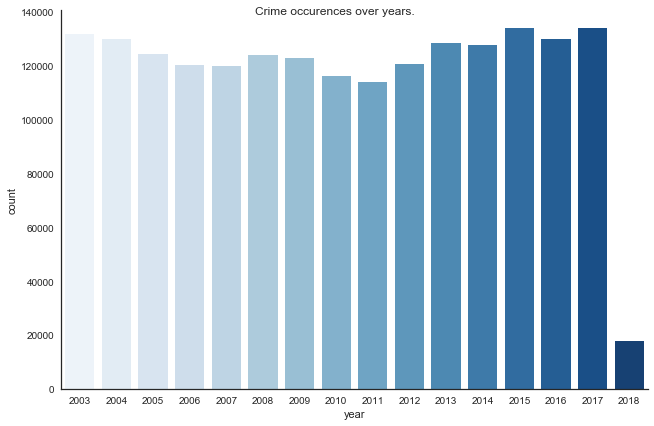

In [6]:
g = sns.factorplot(x="year", data=crime_data, kind="count",
                   palette="Blues", size=6, aspect=1.5, order=np.sort(crime_data['year'].unique()))
g.set_xticklabels(step=1)
g.fig.suptitle('Crime occurences over years.')

Text(0.5,0.98,u'Crime occurences on each weekday.')

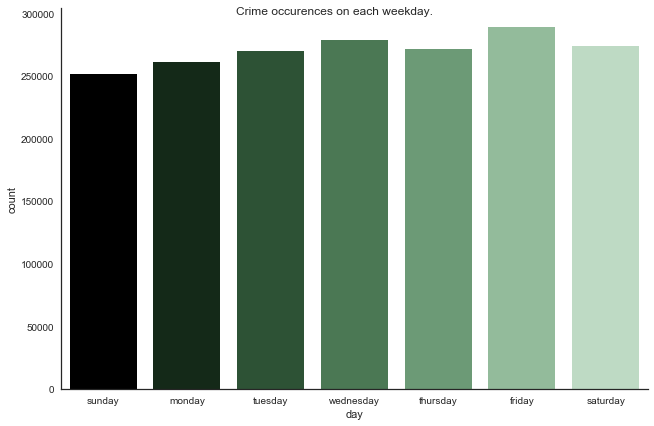

In [25]:
g = sns.factorplot(x="day", data=crime_data, kind="count",
                   palette=sns.cubehelix_palette(8, start=2, rot=0, dark=0, light=.95, reverse=True), size=6, aspect=1.5, order=['sunday', 'monday', 'tuesday', 'wednesday', 'thursday', 'friday', 'saturday'])
g.set_xticklabels(step=1)
g.fig.suptitle('Crime occurences on each weekday.')

Text(0.5,0.98,u'Crime occurences over months.')

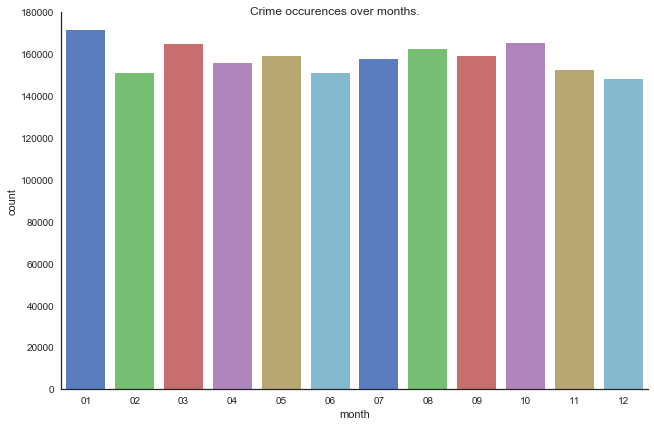

In [23]:
g = sns.factorplot(x="month", data=crime_data, kind="count",
                   palette="muted", size=6, aspect=1.5, order=np.sort(crime_data['month'].unique()))
g.set_xticklabels(step=1)
g.fig.suptitle('Crime occurences over months.')

In [33]:
time_interval_num = crime_data['time'].apply(discretizeTime)
crime_data['time_interval_num'] = time_interval_num

Text(0.5,0.98,u'Crime occurences over time intervals.')

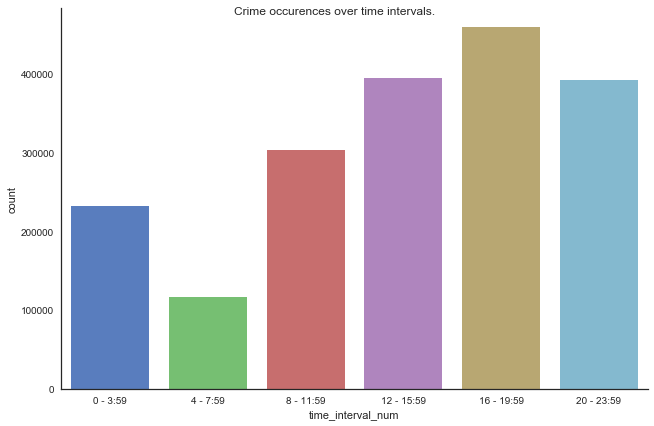

In [39]:
g = sns.factorplot(x="time_interval_num", data=crime_data, kind="count",
                   palette="muted", size=6, aspect=1.5, order=['0 - 3:59', '4 - 7:59', '8 - 11:59', '12 - 15:59', '16 - 19:59', '20 - 23:59'])
g.set_xticklabels(step=1)
g.fig.suptitle('Crime occurences over time intervals.')

In [60]:
district = crime_data['district'].value_counts()

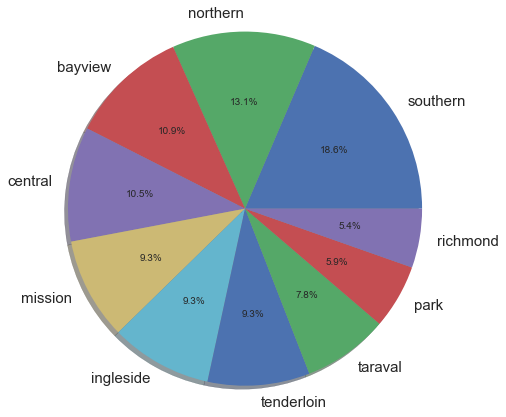

In [71]:
# pie chart of district wise crime percentages
labels = ['southern', 'northern', 'bayview', 'central', 'mission', 'ingleside', 'tenderloin', 'taraval', 'park', 'richmond']
sizes = [district['southern'], district['northern'], district['bayview'], district['central'], district['ingleside'], district['tenderloin'], district['ingleside'], district['taraval'], district['park'],  district['richmond'] ]


# print(sizes) # adds up to 1433, which is the total number of participants
fig1, ax1 = plt.subplots(figsize = (7,7))
patches, texts, autotexts = ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True)
for i in range(0, len(district)):
    texts[i].set_fontsize(15)
ax1.axis('equal')
plt.show()


In [83]:
category = crime_data['category'].unique()
category_count = crime_data['category'].value_counts()
print category

labels=[]
sizes = []

for i in category:
    labels.append(i)
    sizes.append(category_count[i])


['robbery' 'assault' 'vandalism' 'burglary' 'larceny/theft'
 'drug/narcotic' 'warrants' 'vehicle theft' 'other offenses' 'weapon laws'
 'arson' 'missing person' 'driving under the influence' 'suspicious occ'
 'recovered vehicle' 'drunkenness' 'trespass' 'fraud' 'disorderly conduct'
 'sex offenses, forcible' 'kidnapping' 'stolen property' 'liquor laws'
 'family offenses' 'trea' 'runaway' 'prostitution'
 'pornography/obscene mat' 'sex offenses, non forcible' 'extortion']


In [ ]:
# pie chart of district wise crime percentages

# print labels
# print sizes
# #print(sizes) # adds up to 1433, which is the total number of participants
# fig1, ax1 = plt.subplots(figsize = (20,20))
# patches, texts, autotexts = ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True)
# for i in range(0, len(category_count)):
#     texts[i].set_fontsize(15)
# ax1.axis('equal')
# plt.show()


Text(0.5,0.98,u'Crime occurences over years.')

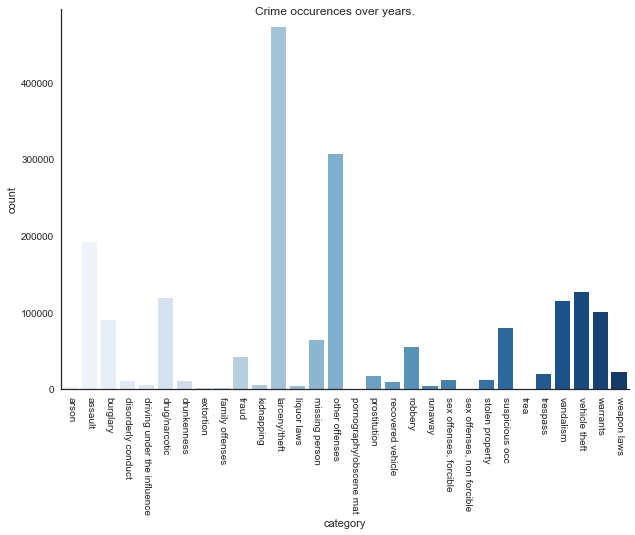

In [12]:
g = sns.factorplot(x="category", data=crime_data, kind="count",
                   palette="Blues", size=6, aspect=1.5, order=np.sort(crime_data['category'].unique()))
g.set_xticklabels(rotation = -90)
g.fig.suptitle('Crime occurences over years.')

In [136]:
filtero= crime_data.query("near_colleges==1 & label=='high'").groupby('time_interval').agg('count')
y_colleges = filtero["near_colleges"]

In [137]:
filtero= crime_data.query("near_facilities==1 & label=='high'").groupby('time_interval').agg('count')
y_facilities = filtero["near_facilities"]

In [138]:
filtero= crime_data.query("near_private_spaces==1 & label=='high'").groupby('time_interval').agg('count')
y_private_spaces = filtero["near_private_spaces"]


In [139]:
filtero= crime_data.query("near_public_open_spaces == 1 & label=='high'").groupby('time_interval').agg('count')
y_public_open_spaces = filtero["near_public_open_spaces"]


In [140]:
filtero= crime_data.query("near_commuter_stops == 1 & label=='high'").groupby('time_interval').agg('count')
y_commuter_stops = filtero["near_commuter_stops"]

In [141]:
filtero= crime_data.query("near_public_park == 1 & label=='high'").groupby('time_interval').agg('count')
y_public_park = filtero["near_public_park"]

In [142]:
filtero= crime_data.query("near_landmarks == 1 & label=='high'").groupby('time_interval').agg('count')
y_landmarks = filtero["near_landmarks"]

In [143]:
filtero= crime_data.query("near_schools == 1 & label=='high'").groupby('time_interval').agg('count')
y_schools = filtero["near_schools"]

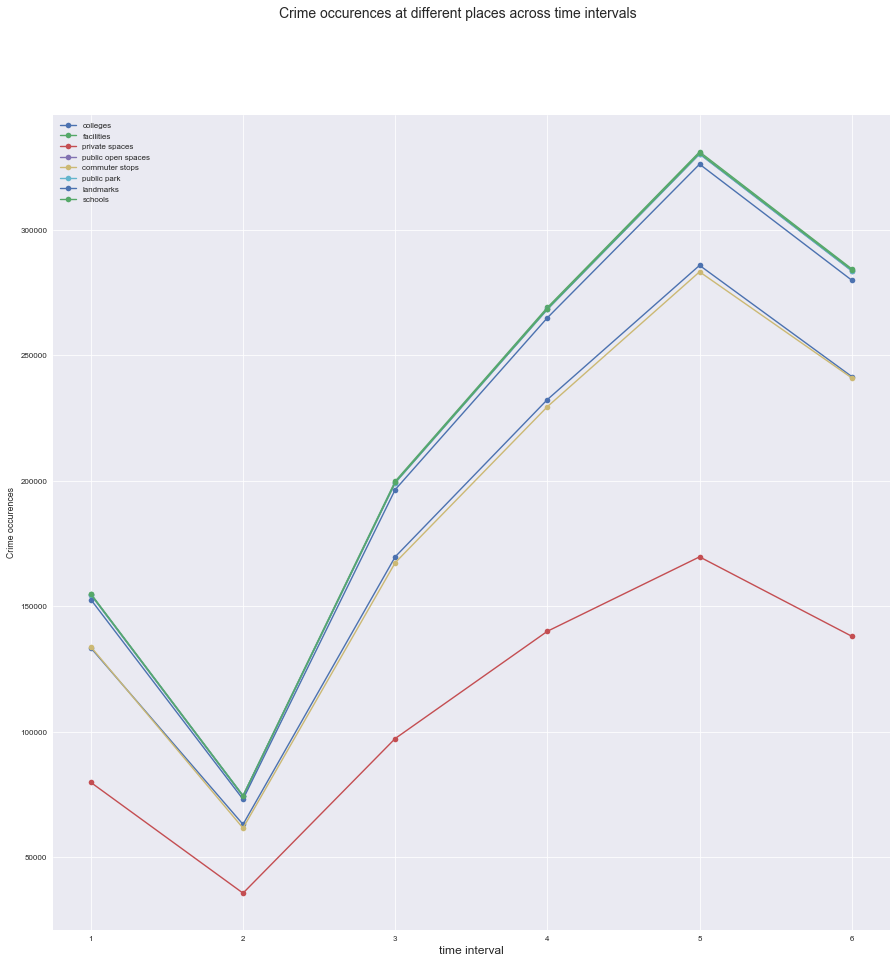

In [153]:
plt.style.use('seaborn-darkgrid')
#print(plt.style.available)
x=[1,2,3,4,5,6]
plt.suptitle('Crime occurences at different places across time intervals', fontsize=14)
plt.xlabel("time interval", fontsize=12)
plt.ylabel("Crime occurences")
plt.plot(x,y_colleges,'-o')
plt.plot(x,y_facilities, '-o')
plt.plot(x,y_private_spaces, '-o')
plt.plot(x,y_public_open_spaces, '-o')
plt.plot(x,y_commuter_stops, '-o')
plt.plot(x,y_public_park, '-o')
plt.plot(x,y_landmarks, '-o')
plt.plot(x,y_schools, '-o')

fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 5
fig_size[1] = 5
plt.rcParams["figure.figsize"] = fig_size

plt.legend(['colleges', 'facilities', 'private spaces', 'public open spaces', 'commuter stops', 'public park', 'landmarks', 'schools'], loc='upper left')

